# IMPORTING MODULES

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Understanding & Cleaning 


In [2]:
# Load the dataset 
Data=pd.read_csv(r"Students Social Media Addiction (1).csv")
# Check first few rows
Data.head(2)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3


In [8]:
# Info about dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [4]:
# Statistical Summary
Data.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


# Handle missing values, if any


In [12]:
# Check missing values
Data.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

# 2. Exploratory Data Analysis (EDA) 

## ● Understand relationships between:

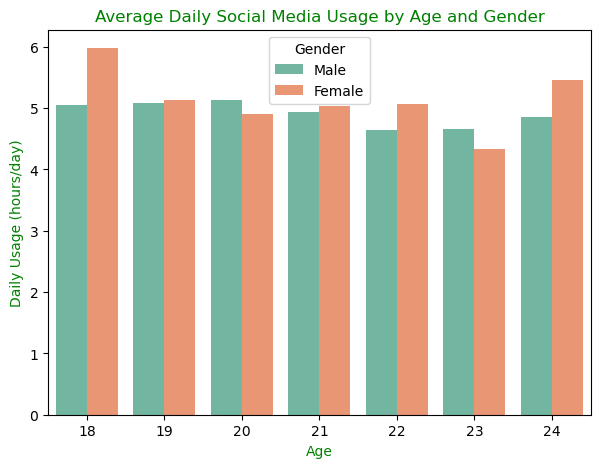

In [9]:
# Age, Gender, Daily Usage (in hours) 
plt.figure(figsize=(7,5))
sns.barplot(x="Age", y="Avg_Daily_Usage_Hours", hue="Gender", data=Data,errorbar=None, palette="Set2")

plt.title("Average Daily Social Media Usage by Age and Gender",color="green")
plt.xlabel("Age",color="green")
plt.ylabel("Daily Usage (hours/day)",color="green")
plt.legend(title="Gender")
plt.show()

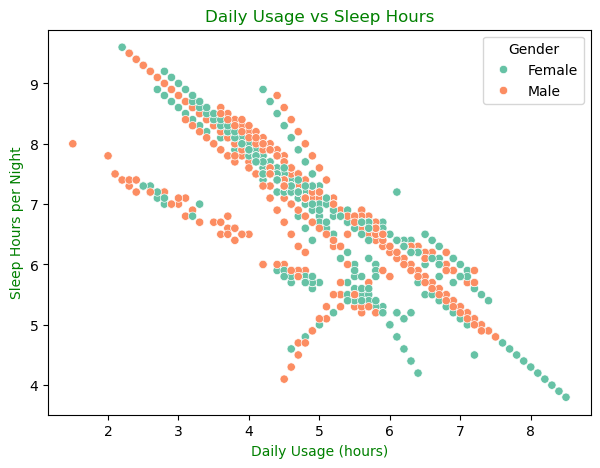

Correlation between usage and sleep: -0.790582455479992


In [10]:
# Sleep patterns, Academic performance, Social interaction
# 1. Daily Usage vs Sleep Patterns
plt.figure(figsize=(7,5))
sns.scatterplot(x="Avg_Daily_Usage_Hours", y="Sleep_Hours_Per_Night", data=Data, hue="Gender", palette="Set2")
plt.title("Daily Usage vs Sleep Hours",color="green")
plt.xlabel("Daily Usage (hours)",color="green")
plt.ylabel("Sleep Hours per Night",color="green")
plt.show()
print("Correlation between usage and sleep:", 
      Data["Avg_Daily_Usage_Hours"].corr(Data["Sleep_Hours_Per_Night"]))

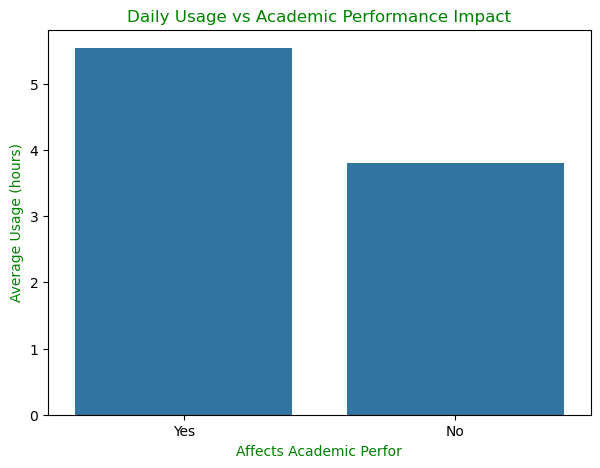

Average usage by academic impact:
Affects_Academic_Performance
No     3.804365
Yes    5.538631
Name: Avg_Daily_Usage_Hours, dtype: float64


In [11]:
# 2. Daily Usage vs Academic Performance
plt.figure(figsize=(7,5))
sns.barplot(x="Affects_Academic_Performance", y="Avg_Daily_Usage_Hours", data=Data,errorbar=None)
plt.title("Daily Usage vs Academic Performance Impact",color="green")
plt.ylabel("Average Usage (hours)",color="green")
plt.xlabel("Affects Academic Perfor",color="green")
plt.show()

print("Average usage by academic impact:")
print(Data.groupby("Affects_Academic_Performance")["Avg_Daily_Usage_Hours"].mean())

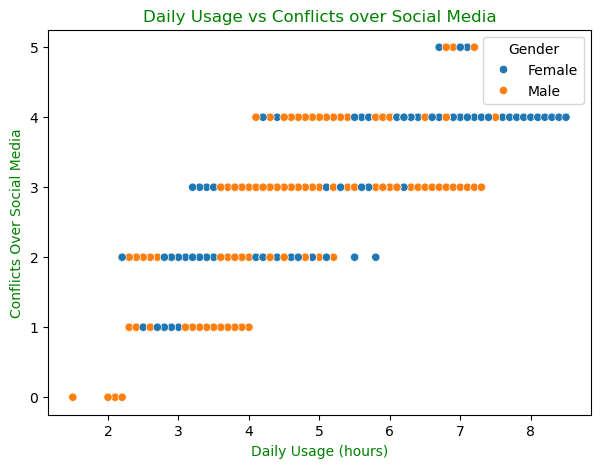

In [7]:
# 3. Daily Usage vs Social Interaction 
    # Daily Usage vs Conflicts over Social Media
plt.figure(figsize=(7,5))
sns.scatterplot(x="Avg_Daily_Usage_Hours", y="Conflicts_Over_Social_Media", data=Data, hue="Gender")
plt.title("Daily Usage vs Conflicts over Social Media",color="green")
plt.xlabel("Daily Usage (hours)",color="green")
plt.ylabel("Conflicts Over Social Media",color="green")
plt.show()

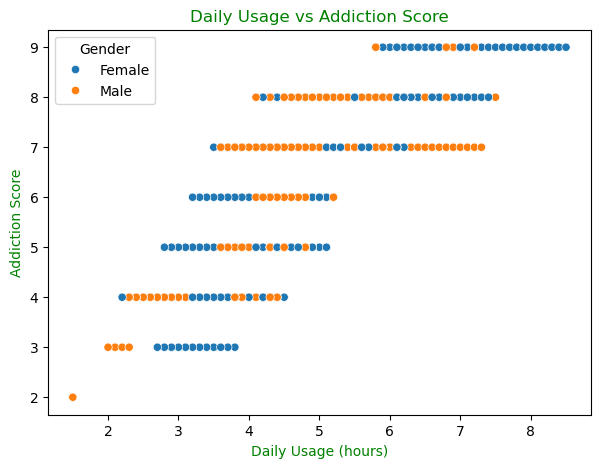

In [8]:
# Daily Usage vs Addiction Score
plt.figure(figsize=(7,5))
sns.scatterplot(x="Avg_Daily_Usage_Hours", y="Addicted_Score", data=Data, hue="Gender")
plt.title("Daily Usage vs Addiction Score",color="green")
plt.xlabel("Daily Usage (hours)",color="green")
plt.ylabel("Addiction Score",color="green")
plt.show()

## ● Analyze how addiction varies across demographics

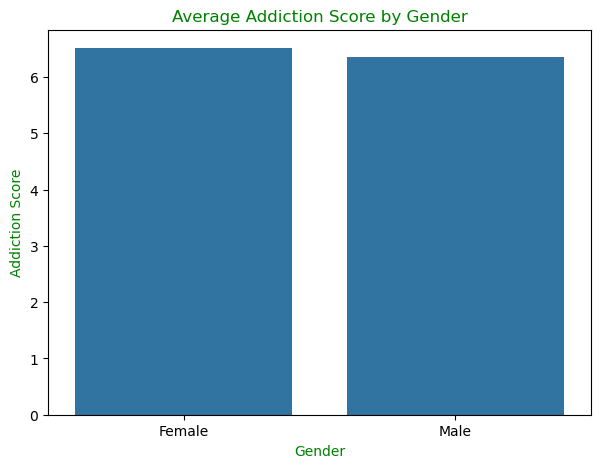

Gender
Female    6.515581
Male      6.357955
Name: Addicted_Score, dtype: float64


In [12]:
# 1. Addiction Score by Gender
plt.figure(figsize=(7,5))
sns.barplot(x="Gender", y="Addicted_Score", data=Data, estimator="mean",errorbar=None)
plt.title("Average Addiction Score by Gender",color="green")
plt.xlabel("Gender",color="green")
plt.ylabel("Addiction Score",color="green")
plt.show()

print(Data.groupby("Gender")["Addicted_Score"].mean())


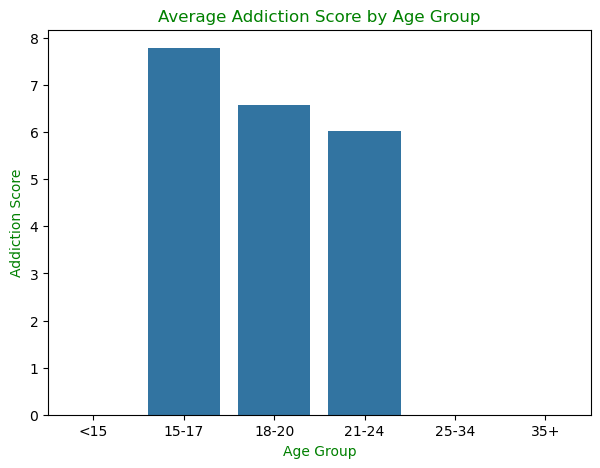

Age_Group
15-17    7.785714
18-20    6.572314
21-24    6.028986
Name: Addicted_Score, dtype: float64


In [13]:
# 2. Addiction Score by Age Group
# Create Age Groups
bins = [0, 15, 18, 21, 25, 35, 100]
labels = ["<15","15-17","18-20","21-24","25-34","35+"]
Data["Age_Group"] = pd.cut(Data["Age"], bins=bins, labels=labels)

plt.figure(figsize=(7,5))
sns.barplot(x="Age_Group", y="Addicted_Score", data=Data, estimator="mean",errorbar=None)
plt.title("Average Addiction Score by Age Group",color="green")
plt.xlabel("Age Group",color="green")
plt.ylabel("Addiction Score",color="green")
plt.show()

print(Data.groupby("Age_Group",observed=True)["Addicted_Score"].mean())

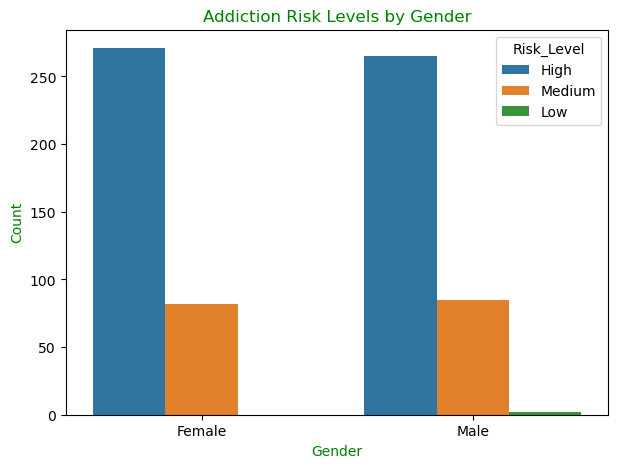

In [14]:
# 3. Addiction Risk Levels by Gender
   # Define Risk Levels
def classify_risk(hours):
    if hours <= 2:
        return "Low"
    elif hours <= 4:
        return "Medium"
    else:
        return "High"

Data["Risk_Level"] = Data["Avg_Daily_Usage_Hours"].apply(classify_risk)

plt.figure(figsize=(7,5))
sns.countplot(x="Gender", hue="Risk_Level", data=Data)
plt.title("Addiction Risk Levels by Gender",color="Green")
plt.xlabel("Gender",color="green")
plt.ylabel("Count",color="green")
plt.show()

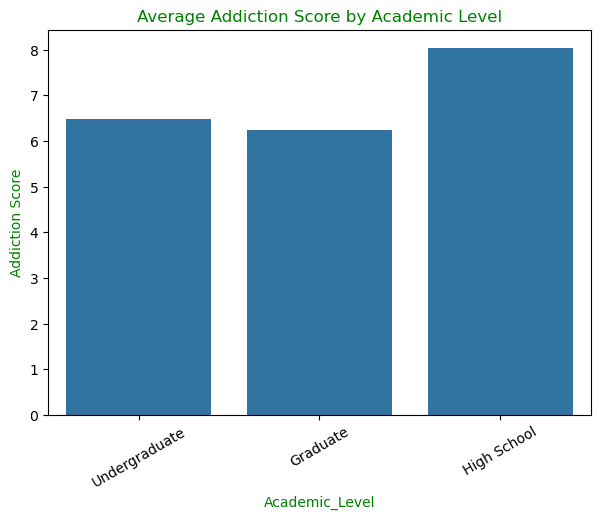

Academic_Level
Graduate         6.243077
High School      8.037037
Undergraduate    6.492918
Name: Addicted_Score, dtype: float64


In [15]:
# 4. Addiction Score by Academic Level
plt.figure(figsize=(7,5))
sns.barplot(x="Academic_Level", y="Addicted_Score", data=Data, estimator="mean", errorbar=None)
plt.title("Average Addiction Score by Academic Level",color="green")
plt.xlabel("Academic_Level",color="green")
plt.ylabel("Addiction Score",color="green")
plt.xticks(rotation=30)
plt.show()

print(Data.groupby("Academic_Level")["Addicted_Score"].mean())

# 3. Aggregation & Insights 

In [83]:
# ● Use groupby and aggregation to find average addiction level across different: 
# Genders 
# Age groups 
# Education levels 

# 3.1 Average addiction by Gender
avg_by_gender =Data.groupby("Gender")["Addicted_Score"].mean().reset_index()
print(" Average Addiction by Gender:")
print(avg_by_gender, "\n")

 Average Addiction by Gender:
   Gender  Addicted_Score
0  Female        6.515581
1    Male        6.357955 



In [13]:
# 3.2 Average addiction by Age Group
avg_by_age =Data.groupby("Age_Group",observed=True)["Addicted_Score"].mean().reset_index()
print("Average Addiction by Age Group:")
print(avg_by_age, "\n")

Average Addiction by Age Group:
  Age_Group  Addicted_Score
0     15-17        7.785714
1     18-20        6.572314
2     21-24        6.028986 



In [14]:
# 3.3 Average addiction by Academic Level
avg_by_academic =Data.groupby("Academic_Level")["Addicted_Score"].mean().reset_index()
print("Average Addiction by Academic Level:")
print(avg_by_academic, "\n")

Average Addiction by Academic Level:
  Academic_Level  Addicted_Score
0       Graduate        6.243077
1    High School        8.037037
2  Undergraduate        6.492918 



# 4. Functions, Loops, and Conditionals 

In [39]:
# Create custom functions to: 
#  Classify risk level (Low/Medium/High) based on usage hours 
def classify_risk(hours):
    if hours <= 2:
        return "Low"
    elif hours <= 4:
        return "Medium"
    else:
        return "High"

# Apply function to dataset
Data["Risk_Level"] =Data["Avg_Daily_Usage_Hours"].apply(classify_risk)

Data[["Avg_Daily_Usage_Hours", "Risk_Level"]].head()
        

,Avg_Daily_Usage_Hours,Risk_Level
0,5.2,High
1,2.1,Medium
2,6.0,High
3,3.0,Medium
4,4.5,High


In [38]:
# Suggest digital detox strategies using if-else blocks 
def suggest_detox(risk, sleep_hours):
    if risk == "Low":
        return "Maintain healthy habits"
    elif risk == "Medium":
        if sleep_hours < 6:
            return "Reduce screen time to <3 hrs"
        else:
            return "Set app time limits"
    elif risk == "High":
        if sleep_hours < 6:
            return "Immediate digital detox challenge"
        else:
            return "Uninstall most-used apps"
    else:
        return "No suggestion available."

# Apply function row by row
Data["Detox_Strategy"] =Data.apply(lambda row: suggest_detox(row["Risk_Level"], row["Sleep_Hours_Per_Night"]), axis=1)

Data[["Risk_Level", "Sleep_Hours_Per_Night", "Detox_Strategy"]].head(10)


,Risk_Level,Sleep_Hours_Per_Night,Detox_Strategy
0,High,6.5,Uninstall most-used apps
1,Medium,7.5,Set app time limits
2,High,5.0,Immediate digital detox challenge
3,Medium,7.0,Set app time limits
4,High,6.0,Uninstall most-used apps
5,High,4.5,Immediate digital detox challenge
6,Low,8.0,Maintain healthy habits
7,High,6.0,Uninstall most-used apps
8,Medium,6.5,Set app time limits
9,Medium,7.0,Set app time limits


# 5. Data Visualization

In [ ]:
# Use at least 4 different types of visualizations: 
  # Bar chart, Pie chart, Heatmap, Line plot, etc. 
# Each chart must include: 
  # Clear title, labeled axes 
  # A short written story/insight below the chart (1–2 lines)

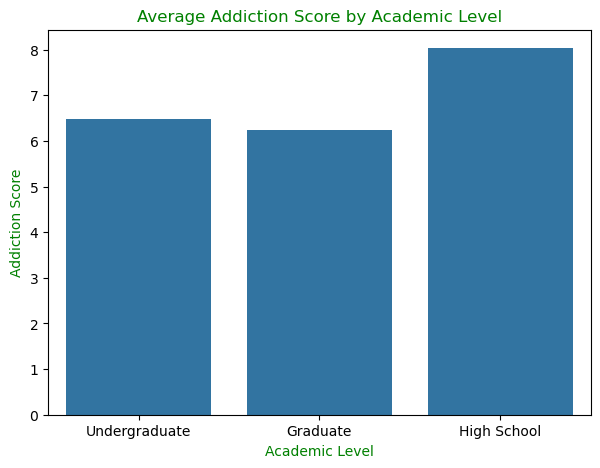

In [42]:
# 1. Bar Chart
plt.figure(figsize=(7,5))
sns.barplot(x="Academic_Level", y="Addicted_Score", data=Data, estimator="mean", errorbar=None)
plt.title("Average Addiction Score by Academic Level",color="green")
plt.xlabel("Academic Level",color="green")
plt.ylabel("Addiction Score",color="green")
plt.show()

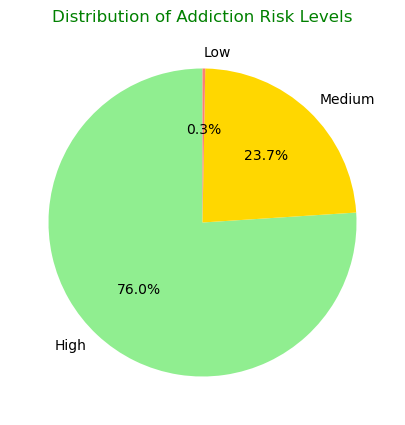

In [17]:
# 2. Pie Chart
risk_counts = Data["Risk_Level"].value_counts()

plt.figure(figsize=(7,5))
plt.pie(risk_counts, labels=risk_counts.index, autopct="%1.1f%%", startangle=90, colors=["lightgreen","gold","salmon"])
plt.title("Distribution of Addiction Risk Levels",color="green")
plt.show()

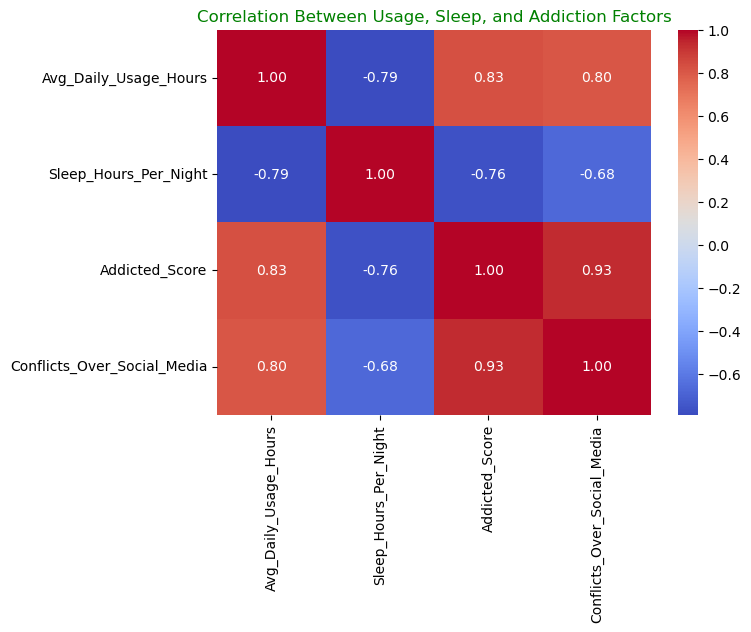

In [76]:
# 3. Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(Data[["Avg_Daily_Usage_Hours","Sleep_Hours_Per_Night","Addicted_Score","Conflicts_Over_Social_Media"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Usage, Sleep, and Addiction Factors",color="green")
plt.show()

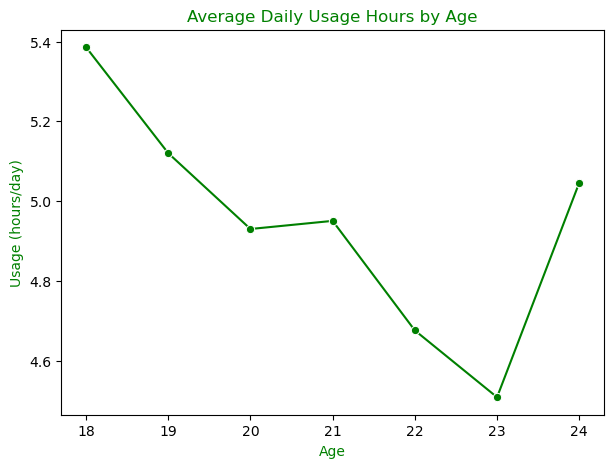

In [16]:
# 4. Line Plot
age_usage =Data.groupby("Age")["Avg_Daily_Usage_Hours"].mean()

plt.figure(figsize=(7,5))
sns.lineplot(x=age_usage.index, y=age_usage.values, marker="o",color="green")
plt.title("Average Daily Usage Hours by Age",color="green")
plt.xlabel("Age",color="green")
plt.ylabel("Usage (hours/day)",color="green")
plt.show()